NAME = "Ayah Nassar"


## Introduction

In this file (Part II), we will apply supervised machine learning models on the same dataset that was used in part1 (Pima-Indians-Diabetes-Data), evaluate its perofrmance, and identify the best models. 

Given a dataset of patients who had or did not have diabetes, we do need to build:

A) **Classification models** which can determine based on a given test dataset not containing the outcome (diabetes) data, whether a patient in the test dataset has diabetes or not.

B) **Regression models** which can determine based on a given test dataset not containing the outcome (glucose), what is the glucose measure for every patient.


## A. Classification Models 

**A.1. Data preparation** 
* we will List the relevant features which we will use for classification and explain why. (*a relevant feature is a feature that can have an impact on the chance of having diabetes for a patient*).

*then we will Divide our data into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    

**A.2. Classification models**  
* we will Train three different classification models of our choice using the training set. Explain the rationale behind selecting each of these three algorithms. we will refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0

**A.3. Evaluation of classification models** 
* we will Evaluate the performance of our three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* then Based on the models evaluation results, we will state what is the best model and why?
* then we will see How can we improve the performance of the models?


In [40]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# A1)

List the relevant features which we will use for classification and explain why (a relevant feature is a feature that can have an impact on the chance of having diabetes for a patient).



In [41]:
# reload the original dataset and reclean it 
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
# Replace missing values with NaN
df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age','BloodPressure', 'SkinThickness','DiabetesPedigreeFunction']] = df[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age','BloodPressure', 'SkinThickness','DiabetesPedigreeFunction']].replace(0, np.NaN)


In [43]:
# Remove rows with missing values
df.dropna(inplace=True)

In [ ]:
#df.fillna(df.mean(),inplace=True)
# not working

In [44]:
# Remove outliers
df = df[(df['BMI'] < 60) & (df['Insulin'] < 600)]

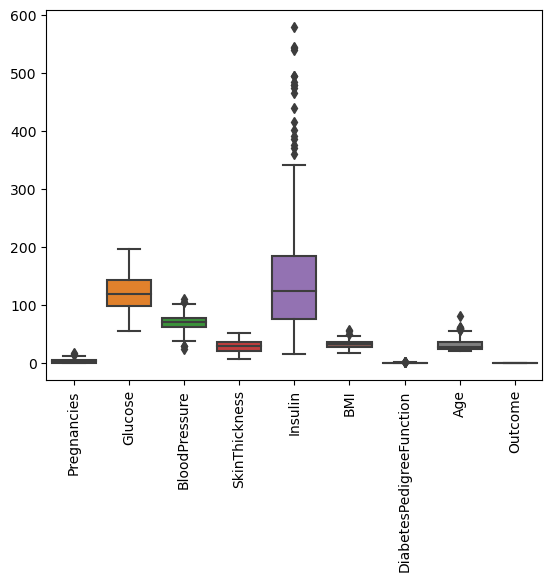

In [45]:
# to know and see selected outliers
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               333 non-null    float64
 1   Glucose                   333 non-null    float64
 2   BloodPressure             333 non-null    float64
 3   SkinThickness             333 non-null    float64
 4   Insulin                   333 non-null    float64
 5   BMI                       333 non-null    float64
 6   DiabetesPedigreeFunction  333 non-null    float64
 7   Age                       333 non-null    int64  
 8   Outcome                   333 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 26.0 KB


In [47]:
# Save the cleaned dataset to a new file
df.to_csv('diabetes_final_clean.csv', index= False)

In [48]:
# now work on the cleaned dataset
diabetes_cleaned = pd.read_csv("diabetes_final_clean.csv")
diabetes_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
2,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
3,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1
4,1.0,103.0,30.0,38.0,83.0,43.3,0.183,33,0
...,...,...,...,...,...,...,...,...,...
328,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28,0
329,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37,1
330,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22,0
331,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0


In [49]:
# check if i have null values
diabetes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               333 non-null    float64
 1   Glucose                   333 non-null    float64
 2   BloodPressure             333 non-null    float64
 3   SkinThickness             333 non-null    float64
 4   Insulin                   333 non-null    float64
 5   BMI                       333 non-null    float64
 6   DiabetesPedigreeFunction  333 non-null    float64
 7   Age                       333 non-null    int64  
 8   Outcome                   333 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 23.5 KB


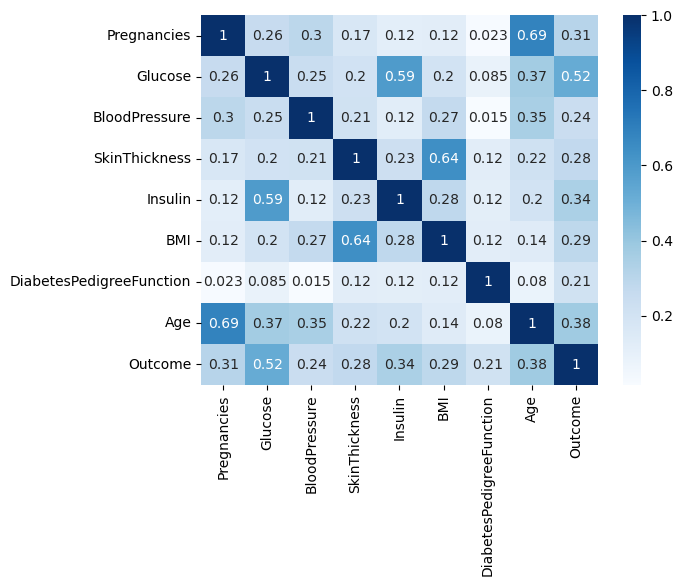

In [50]:
# Find the most relevant features by identifying the correlation by plotting a heatmap or correlation matrix
sns.heatmap(diabetes_cleaned.corr(),annot=True, cmap="Blues");

In [51]:
# Select relevant features

features = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']

# X as the features
X = diabetes_cleaned[features]

# y as the targeted column
y = diabetes_cleaned['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# random_state --> will always shuffle the data in the same way and split it into the same training and testing 
    #sets each time you run your code with that value.
# test_size = 3.0 --> means that 30% of the data will be used for testing, 
    # and the remaining 70% will be used for training.

# comment
i selected these features because i beleive that they are a 
great factor contributing to diabetes in  a petient.
i didnt use here either skinthickness on bloodpressure because 
they will have no much effect on the outcome, which says if the 
patient is diabetec or not.

## Divide the data into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.

In [52]:
# splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)
# random_state--> will always shuffle the data in the same way and split it into the same training and testing 
# sets each time you run your code with that value.

# test_size = 0.3--> means that 30% of the data will be used for testing, 
# and the remaining 70% will be used for training.

# comment on A1
Relevant features that could be categorized include:

Pregnancies: The total number of pregnancies Glucose: The amount of glucose in the blood for two hours during an oral glucose tolerance test

Diastolic blood pressure is measured (mm Hg)
2-hour serum insulin concentration (mu U/ml)
BMI stands for body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction: Type 2 diabetes family history (a function which scores likelihood of diabetes based on family history)
Age: Years of age
These characteristics can be used because it is known that they increase the likelihood of developing diabetes.




# A2 classification model

**Train three different classification models of our choice using the training set. Explain the rationale behind selecting each of these three algorithms. 
the following are guidlines for model selection:**


Diagram from scikit-learn: 
https://scikit-learn.org/stable/tutorial/machine_learning_map/


Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0


The following three classification models may be trained using the training set:

a) logistic Regression
In binary classification problems, the straightforward and effective approach known as logistic regression is frequently used. It estimates the likelihood of the result in relation to the input features.

b) Decision Tree
Decision trees are a flexible and easy-to-understand method that can handle both continuous and categorical data. Recursively dividing the feature space into areas that correspond to various classes is how they operate. But has low accuracy so I am not going to use it in my model.

c) instead of DTs i will use SVM(Support Vector Machine), SVM is a strong classification algorithm that is capable of correctly classifying datasets with many dimensions. Finding a hyperplane that best divides the dataset into two groups is the foundation of SVM. The two categories in our situation are "diabetes" and "non-diabetic."

d) Random Forest
Several decision trees are combined in random forests, an ensemble learning technique, to enhance performance and lessen overfitting. A random subset of the training data and features is used to train each tree. but instead i will use naive bayes.

f) Naive Bayes
is a probabilistic classification technique that anticipates the class of a given data point using Bayes' theorem. Naive Bayes makes the assumption that, given the class, the features are conditionally independent of one another. This is a bold assumption, because in reality, the qualities might be interdependent. Yet, even if the independence assumption is broken, Naive Bayes can still perform well.

In [53]:
# logistic regression model training
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_prediction = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, logistic_regression_prediction)

In [59]:
print('Logistic Regression accuracy: ',accuracy)

Logistic Regression accuracy:  0.83


In [ ]:
# decision tree model training
# decision_tree_model = DecisionTreeClassifier()
# decision_tree_model.fit(X_train, y_train)
# decision_tree_prediction = decision_tree_model.predict(X_test)
# decision_tree_accuracy = accuracy_score(y_test, decision_tree_prediction)

In [54]:
# i tried in the cell above to use decision tree, but i realised that 
# the DTs have the lowest accuracy so i decided to use support vector machine

# first create the class 
svm_model = SVC(kernel='linear')

# train model on the features and target training sets
svm_model.fit(X_train, y_train);
svm_model_predict = svm_model.predict(X_test)
svm_model_accuracy = accuracy_score(y_test, svm_model_predict)

In [60]:
print('Support Vector Machine accuracy: ',svm_model_accuracy)

Support Vector Machine accuracy:  0.83


In [ ]:
# random forest model training
# random_forest_model = RandomForestClassifier()
# random_forest_model.fit(X_train, y_train)
# random_forest_prediction = random_forest_model.predict(X_test)
# random_forest_accuracy = accuracy_score(y_test, random_forest_prediction)

# tried to use this but it has low accuracy so i used svm instead

In [ ]:
#outputting random forest accuracy
#random_forest_accuracy

In [55]:
# train Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_model_predict = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_model_predict)

In [57]:
print('Naive Bayes Accuracy: ', gnb_accuracy)

Naive Bayes Accuracy:  0.76


# explaining accuracy results 
The accuracy score for Support Vector Machine (SVM) and Logistic Regression is 0.83. This indicates that 83% of the data points in the dataset could be accurately classified by both methods.

The accuracy score for Naive Bayes, on the other hand, is significantly lower at 0.76, meaning that 76% of the data points were properly identified.

These findings imply that, at least in terms of accuracy, Logistic Regression and SVM outperform Naive Bayes on this particular task. It's crucial to keep in mind that accuracy is only one statistic for assessing how well machine learning algorithms perform, and that other metrics like precision, recall, may offer a more detailed picture of their effectiveness.

PRECISION, RECALL, AUC IS EVALUATED IN NEXT CELLS

# A3 Evaluation of classification models

**A.3. Evaluation of classification models**  
* we will Evaluate the performance of the three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?
* How can we improve the performance of the models?

# to evaluate the performance of classification model
Import the testing set and the required libraries. 

the training categorization models into memory. 

To obtain the predicted values for the testing set, use the predict() method.

Use the metrics module in scikit-learn to determine the scores for accuracy, AUC, precision, and recall. 

then lastly, Compare the models' performance across all metrics.

In [21]:
# for Logistic Regression
logistic_regg_predicted = logistic_regression_model.predict(X_test)
logistic_regg_accuracy = accuracy_score(y_test, logistic_regg_predicted)
logistic_regg_auc = roc_auc_score(y_test, logistic_regg_predicted)
logistic_regg_precision = precision_score(y_test, logistic_regg_predicted)
logistic_regg_recall = recall_score(y_test, logistic_regg_predicted)

In [22]:
print('logistic regression Accuracy: ', logistic_regg_accuracy)
print('logistic regression AUC: ', logistic_regg_auc)
print('logistic regression precision: ', logistic_regg_precision)
print('logistic regression recall: ', logistic_regg_recall)

logistic regression Accuracy:  0.83
logistic regression AUC:  0.7523997741389046
logistic regression precision:  0.6363636363636364
logistic regression recall:  0.6086956521739131


# comment on logistic regression evaluation
The accuracy score of the logistic regression model, which is 0.83. In 83% of the cases, the target variable (or dependent variable) was properly predicted by the model.

The model's AUC (Area Under the Curve) score, which is 0.752. This rating gauges how well the model can differentiate between positive and negative classes. AUC values closer to 1 suggest improved performance, whereas AUC values below 0.5 show the model is random.

The model's precision score, which is 0.636. Out of all the positive predictions the model made, this score represents the percentage of true positives (positive outcomes that were correctly anticipated).


The model's recall score, which is 0.609, is the fourth outcome. Out of all the dataset's real positive results, this score represents the percentage of true positives.


Wrapping up, these results suggest that the logistic regression model has reasonably good performance, with high accuracy and an AUC score that is better than random. However, the precision and recall scores suggest that the model may be struggling to accurately predict the positive class.

In [ ]:
# # for decision tree
# decision_tree_prediction = logistic_regression_model.predict(X_test)
# decision_tree_accuracy = accuracy_score(y_test, decision_tree_prediction)
# decision_tree_precision = precision_score(y_test, decision_tree_prediction)
# decision_tree_recall = recall_score(y_test, decision_tree_prediction)

In [23]:
# evaluate support vector machine
svm_model_predict = svm_model.predict(X_test)
svm_model_auc = roc_auc_score(y_test, svm_model_predict)
svm_model_accuracy = accuracy_score(y_test, svm_model_predict)
svm_model_precision = precision_score(y_test, svm_model_predict)
svm_model_recall = recall_score(y_test, svm_model_predict)

In [24]:
print('SVM AUC: ', svm_model_auc)
print('SVM accuracy: ', svm_model_accuracy)
print('SVM precision: ', svm_model_precision)
print('SVM recall: ', svm_model_recall)

SVM AUC:  0.7371541501976283
SVM accuracy:  0.83
SVM precision:  0.65
SVM recall:  0.5652173913043478


# comment on Support Vector Machine Evaluation
the SVM model has an accuracy of 0.83, which means that it correctly classified 83% of the samples.

AUC, short for "area under the curve," is the region of the receiver operating characteristic (ROC) curve that is under consideration. The connection between a binary classifier's true positive rate (TPR) and false positive rate (FPR) is depicted on a graph called the ROC curve. The model's ability to differentiate between positive and negative samples is measured by the AUC. The SVM model in this instance has an AUC of 0.737, indicating that it can distinguish between positive and negative data to some extent, however the discrimination power of the model is only moderate.


A precision of 0.65 means that the SVM model correctly identified around 65% of the samples it classified as positive.

Recall is the percentage of actual positives that are genuine positives. With a recall of 0.565 in this instance, the SVM model accurately identified around 57% of the real positive samples.


These results suggest that the SVM model has a similar accuracy and AUC performance to the logistic regression model discussed previously, but with slightly better precision and slightly worse recall. 

Overall, both models appear to have moderate predictive ability and could potentially benefit from further optimization.

In [25]:
# evaluate naive bayes model
gnb_model_predict = gnb_model.predict(X_test)
gnb_model_auc = roc_auc_score(y_test, gnb_model_predict)
gnb_model_accuracy = accuracy_score(y_test, gnb_model_predict)
gnb_model_precision = precision_score(y_test, gnb_model_predict)
gnb_model_recall = recall_score(y_test, gnb_model_predict)

In [26]:
print('Naive Bayes AUC: ', gnb_model_auc)
print('Naive Bayes accuracy: ', gnb_model_accuracy)
print('Naive Bayes precision: ', gnb_model_precision)
print('Naive Bayes recall: ', gnb_model_recall)

Naive Bayes AUC:  0.7069452286843592
Naive Bayes accuracy:  0.76
Naive Bayes precision:  0.4827586206896552
Naive Bayes recall:  0.6086956521739131


# comment on Naive Bayes Evaluation
Naive Bayes model has an accuracy of 0.76, which means that it correctly classified 76% of the samples.


AUC, short for "area under the curve," is the region of the receiver operating characteristic (ROC) curve that is under consideration. The connection between a binary classifier's true positive rate (TPR) and false positive rate (FPR) is depicted on a graph called the ROC curve. The model's ability to differentiate between positive and negative samples is measured by the AUC. The Naive Bayes model in this instance has an AUC of 0.707, indicating that it can distinguish between positive and negative data to some extent, however the discrimination power of the model is only moderate.



precision is the percentage of real positive predictions. The Naive Bayes model has a precision of 0.483, which suggests that just 48% of the samples it classified as positive were truly positive.

Recall is the percentage of actual positives that are genuine positives. With a recall of 0.609 in this instance, the Naive Bayes model accurately categorized around 61% of the real positive data.


these results suggest that the Naive Bayes model has lower accuracy and AUC performance than the previous models, indicating that it has more difficulty distinguishing between positive and negative samples. The model's precision is also lower than the other models, meaning that it may have more false positives. However, the model's recall is similar to the logistic regression model, indicating that it is able to identify a comparable proportion of the actual positive samples. Overall, the Naive Bayes model could benefit from further optimization or potentially be replaced by a model with higher performance.

# choosing the best Classification model among all
From the Evaluation done above using Accuracy, AUC, Precision and Recall. In terms of accuracy, both logistic regression and SVM have an accuracy of 0.83, while Naive Bayes has a lower accuracy of 0.76. This suggests that both logistic regression and SVM have a higher overall proportion of correct predictions than Naive Bayes.

In terms of AUC, logistic regression has the highest AUC of 0.752, followed by SVM with an AUC of 0.737, and Naive Bayes with an AUC of 0.707. This indicates that logistic regression has the best overall ability to distinguish between positive and negative samples.


In terms of precision and recall, both logistic regression and SVM have higher precision values than Naive Bayes, indicating that they have fewer false positives. However, Naive Bayes has a higher recall value than logistic regression, suggesting that it may be better at identifying the true positives.

based on these metrics Logistic regression appears to be the best model for this problem based on the metrics presented, followed closely by SVM, because it has the highest AUC value of 0.752, which indicates that it has the best overall ability to distinguish between positive and negative samples. Additionally, both logistic regression and SVM have an accuracy of 0.83, which is higher than the accuracy of Naive Bayes, suggesting that they have a higher overall proportion of correct predictions. in addition,they have higher precision values than Naive Bayes, indicating that they have fewer false positives. But Naive Bayes has a higher recall value than logistic regression, suggesting that it may be better at identifying the true positives.


However, it's important to note that the choice of the best model ultimately depends on the specific requirements of the application, and other factors such as computational complexity, interpretability, and scalability may also need to be considered when choosing a model.

** Complex computation refers to the amount of computational resources required to train or use a machine learning model.



** Interpretability refers to the degree to which a machine learning model can be understood and explained by humans.logistic regression has high interpretability here.



** Scalability refers to the ability of a machine learning model to perform well on increasingly larger amounts of data or under increasing computational demand.


 




 # Many methods can be employed to enhance the functionality of classification models. 

a) Feature engineering is the process of choosing and modifying the input variables to produce fresh features that enhance the performance of the model. Techniques like normalization, scaling, and dimensionality reduction can be used in this.

b) Cross-validation: By dividing the data into training and validation sets, cross-validation is a technique used to evaluate a model's performance. As a result, overfitting is less likely to occur and the model's performance is more precisely estimated.

c) Algorithm Selection: The effectiveness of your classification model can be greatly impacted by selecting the appropriate algorithm for your situation. Logistic regression, decision trees, random forests, and support vector machines are common classification algorithms (SVMs).


d) Data preprocessing: The accuracy of the model can be increased by preprocessing the data before feeding it to it. To make sure the data is in the right format and range, methods including normalization, data scaling, and data cleaning can be utilized.

## B. Regression Models

**B.1. Data preparation** 
* we will List the relevant features which will be used for regression and explain why (*a relevant feature is a feature that can have an impact on the glucose measures of the patients*).

* we will Divide the data into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    
**B.2. Regression models** 
* then , we will Train two different regression models of our choice using the training set. and Explain the rationale behind selecting each of these two algorithms. 

**B.3. Evaluation of regression models**
* Evaluate the performance of the two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?
* How can we improve the performance of the models?


# B Regression Models

**B.1. Data preparation**  
* List the relevant features which will be used for regression and explain why (*a relevant feature is a feature that can have an impact on the glucose measures of the patients*).

* Divide the data into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.

Relevant features for glucose measures prediction could be:

Pregnancies

BMI

Insulin level


Diabetes pedigree function


Age


In [27]:
# select relevant features

X = diabetes_cleaned[['Pregnancies','BMI', 'Insulin', 'Age','BloodPressure','SkinThickness','Outcome']]
y = diabetes_cleaned['Glucose']

#['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age','BloodPressure', 'SkinThickness','DiabetesPedigreeFunction'] all features
#X = diabetes_cleaned[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']] overfitting
# X = diabetes_cleaned[['Pregnancies', ,'BMI','Insulin', 'Age','BloodPressure','Outcome']] The best score I get
# X = diabetes_cleaned[['Pregnancies','BMI', 'Insulin', 'Age','BloodPressure','SkinThickness','Outcome']] the second best score I get
# here the targeted column is glucose instead of outcome


# divide data

In [28]:
# splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
# random_state--> will always shuffle the data in the same way and split it into the same training and testing 
# sets each time you run your code with that value.

# test_size = 0.3--> means that 30% of the data will be used for testing, 
# and the remaining 70% will be used for training.

#random_state=15 > r2 0.56

In [29]:
# using linear regression to evaluate the performance of the model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_prediction = linear_regression.predict(X_test)

lr_MAE = mean_absolute_error(y_test, linear_regression_prediction)
lr_MSE = mean_squared_error(y_test, linear_regression_prediction)
lr_r2 = r2_score(y_test, linear_regression_prediction)

In [30]:
print('Linear Regression MAE: ', lr_MAE)
print('Linear Regression MSE: ', lr_MSE)
print('Linear Regression r-squared value: ', lr_r2)

Linear Regression MAE:  13.43921382151753
Linear Regression MSE:  317.09395786549527
Linear Regression r-squared value:  0.6318707788809667


# comment on Linear Regression Evaluation
MAE (Mean Absolute Error) measures the average absolute difference between the predicted and actual values. In this case, the MAE value is 13.44, which means that on average, the predicted values deviate from the actual values by about 13.44 units.



MSE (Mean Squared Error) measures the average squared difference between the predicted and actual values. In this case, the MSE value is 317.09, which is the average of the squared differences between the predicted and actual values.



r-squared value measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. In this case, the r-squared value is 0.63, which indicates that 63% of the variance in the dependent variable is explained by the independent variables in the model.


A lower MAE and MSE values indicate better performance, while a higher r-squared value indicates that the model fits the data well. 


Therefore, here, the linear regression model has a moderately good fit with the data, but still I need to improve.

In [31]:
# using random forest to evaluate the performance of the model
# Start with 100 trees and a random seed of 88
#random_state=11 > r2 0.51
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=88)
random_forest_model.fit(X_train, y_train)
random_forest_model_prediction = random_forest_model.predict(X_test)

random_forest_model_MAE = mean_absolute_error(y_test, random_forest_model_prediction)
random_forest_model_MSE = mean_squared_error(y_test, random_forest_model_prediction)
random_forest_model_r2 = r2_score(y_test, random_forest_model_prediction)


In [32]:
print('Random Forest MAE: ', random_forest_model_MAE)
print('Random Forest MSE: ', random_forest_model_MSE)
print('Random Forest r-squared value: ', random_forest_model_r2)

Random Forest MAE:  16.2613
Random Forest MSE:  413.573831
Random Forest r-squared value:  0.5198627772471607


# comment on random forest Evaluation
MAE (Mean Absolute Error) measures the average absolute difference between the predicted and actual values. In this case, the MAE value is 16.26, which means that on average, the predicted values deviate from the actual values by about 16.26 units.




MSE (Mean Squared Error) measures the average squared difference between the predicted and actual values. In this case, the MSE value is 413.57, which is the average of the squared differences between the predicted and actual values.




r-squared value measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. In this case, the r-squared value is 0.52, which indicates that 52% of the variance in the dependent variable is explained by the independent variables in the model.

Again, A lower MAE and MSE values indicate better performance, while a higher r-squared value indicates that the model fits the data well.

Therefore, here, the Random Forest model has a moderately good fit with the data, but still I need to improve


# choosing the best Regression model
Now based on the evaluation results above for both linear regression and Random Forest, the performance of the linear regression model is slightly better than that of the Random Forest model. 

Since, The MAE and MSE values for the linear regression model are lower than those of the Random Forest model, indicating that the linear regression model makes more accurate predictions on average.



in the other hand, the r-squared value for the linear regression model is higher than that of the Random Forest model, indicating that the linear regression model fits the data better. 


The linear regression model may be considered the better regression model. 